# Content
1. Data Analysis : the main aim is to understand more about data.
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [103]:
# import the useful library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [104]:
# read Data 
train=pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [106]:
# make the setting on visualization 
pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

# 1- Exploratory analysis 
In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

#### 1. Missing Values

In [107]:
#print the feature name and the percentage of missing values
a=train.isna().mean().round(4)
a[a>0]

LotFrontage     0.1774
Alley           0.9377
MasVnrType      0.0055
MasVnrArea      0.0055
BsmtQual        0.0253
BsmtCond        0.0253
BsmtExposure    0.0260
BsmtFinType1    0.0253
BsmtFinType2    0.0260
Electrical      0.0007
FireplaceQu     0.4726
GarageType      0.0555
GarageYrBlt     0.0555
GarageFinish    0.0555
GarageQual      0.0555
GarageCond      0.0555
PoolQC          0.9952
Fence           0.8075
MiscFeature     0.9630
dtype: float64

Since they are many missing values, so we need to find the relationship between missing values and traget value Sales price


In [108]:
#make a list of feature variable that have missing value :
feature_nan= [feature for feature in train.columns[train.isna().sum()>0]]

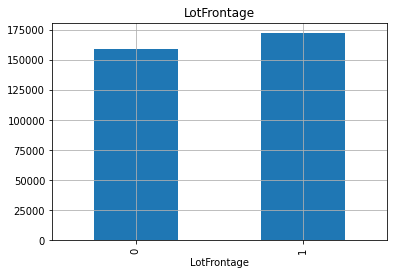

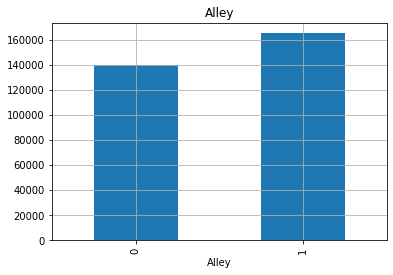

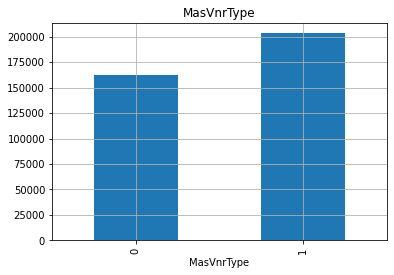

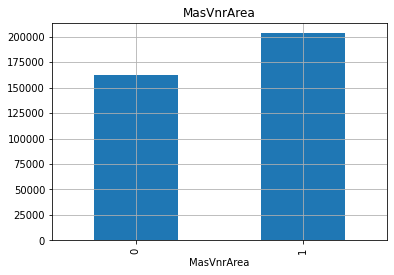

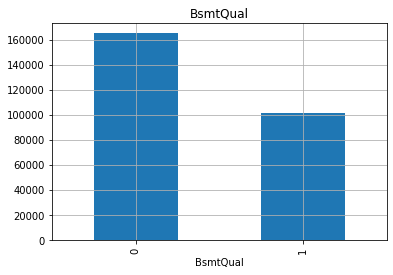

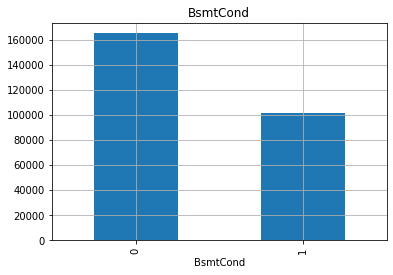

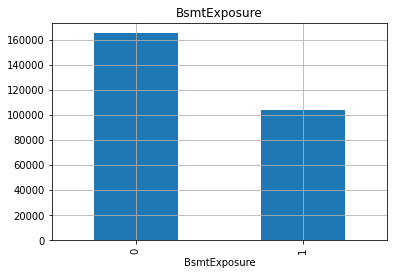

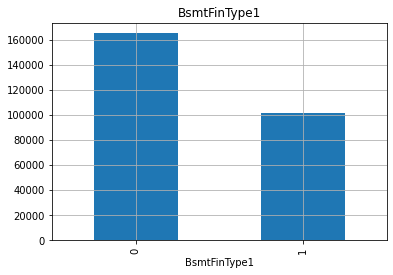

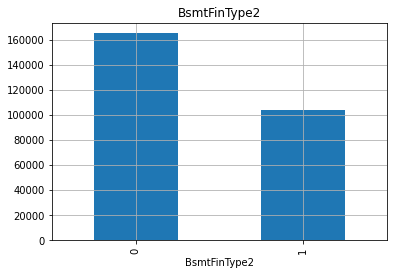

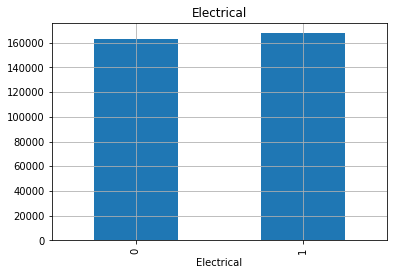

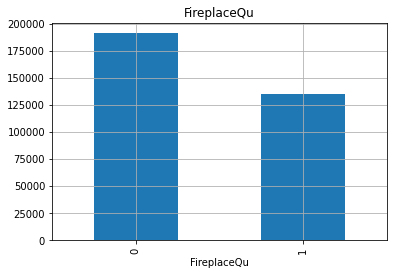

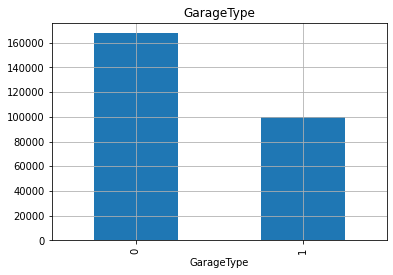

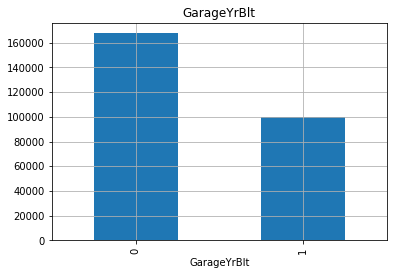

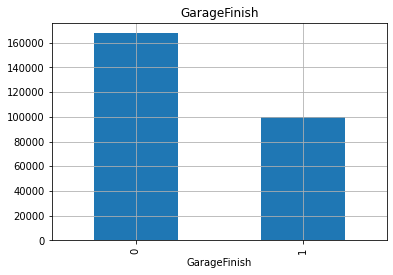

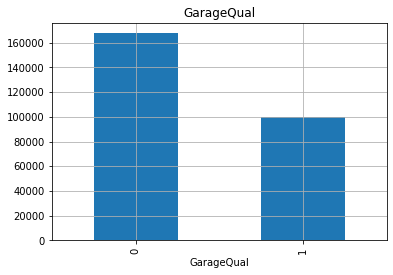

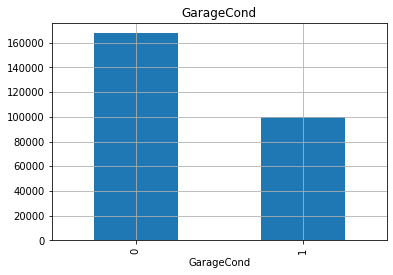

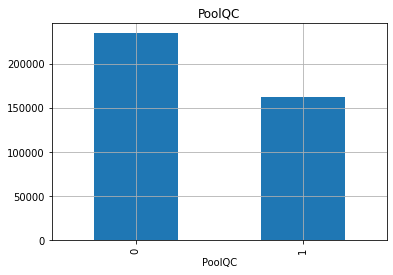

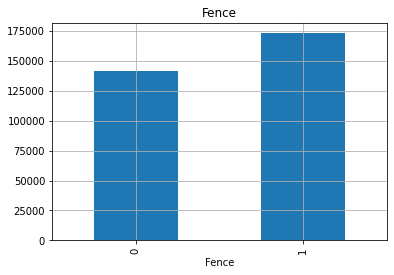

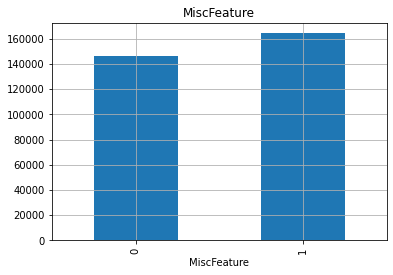

In [109]:
#plot some diagram for this ralionship

for feature in feature_nan:
    data= train.copy()
    
    # make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(),1,0)

    #calculate the median SalePrice where the information is missing or present
    data.groupby(feature)["SalePrice"].median().plot.bar()

    plt.title(feature)
    plt.grid()
    plt.show()

Here with the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

### Feature Engineering

In [114]:
# replace missing categorical value with a new label
## First lets handle Categorical features which are missing
features_nan_categ=[feature for feature in train.columns if train[feature].isnull().sum()>0 and train[feature].dtypes=='O']

def replace_cat_feature(dataSet, feature_nan_categ):
    data= dataSet.copy()
    data[feature_nan_categ]=data[feature_nan_categ].fillna('Missing')
    return data

train= replace_cat_feature(dataSet= train, feature_nan_categ= features_nan_categ)

In [124]:
## Replacing the numerical Missing Values
## First lets handle Numerical features which are missing
numerical_with_nan= [feature for feature in train.columns if train[feature].isna().sum()>0 
                                                            and train[feature].dtypes !='O']


##print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(train[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [125]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ##replace by using median since there are outliers
    median_value=train[feature].median()
    
    ## create a new feature to capture nan values
    train[feature+'nan']=np.where(train[feature].isnull(),1,0)
    train[feature].fillna(median_value,inplace=True)
    
train[numerical_with_nan].isnull().sum()
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [127]:
train.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Mis

### Numerical Variables


Since the numerical variables are skewed we will perform log normal distribution

In [128]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train[feature]=np.log(train[feature])

In [130]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


### Handling rare categorical feature 

we will remove categorical variable that are present less than 1% of the observations

In [136]:
categorical_features=[feature for feature in train.columns if train[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [157]:
for feature in categorical_features:
    labels_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)

In [158]:
train.head(15)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,15,3,4,3,6,7,5,2003,2003,1,2,12,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2,548,3,5,2,0,61,0,0,0,0,0,4,2,0,2,2008,4,4,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,20,1,4,3,4,6,8,1976,1976,1,2,6,6,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,3,5,1976.0,2,2,460,3,5,2,298,0,0,0,0,0,0,4,2,0,5,2007,4,4,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,15,3,4,3,6,7,5,2001,2002,1,2,12,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2,608,3,5,2,0,42,0,0,0,0,0,4,2,0,9,2008,4,4,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,17,3,4,3,6,7,5,1915,1970,1,2,4,7,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3,642,3,5,2,0,35,272,0,0,0,0,4,2,0,2,2006,4,1,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,24,3,4,3,6,8,5,2000,2000,1,2,12,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3,836,3,5,2,192,84,0,0,0,0,0,4,2,0,12,2008,4,4,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,0,0,11,3,4,3,2,5,5,1993,1995,1,2,12,13,1,0.0,1,3,4,3,3,1,6,732,5,0,64,796,5,4,1,5,6.679599,566,0,7.216709,1,0,1,1,1,1,1,5,6,0,1,5,1993.0,1,2,480,3,5,2,40,30,0,320,0,0,0,2,1,700,10,2009,4,4,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,0,0,19,3,4,3,4,8,5,2004,2005,1,2,12,13,4,186.0,2,3,5,4,3,3,6,1369,5,0,317,1686,5,4,1,5,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,6,1,4,5,2004.0,2,2,636,3,5,2,255,57,0,0,0,0,0,4,2,0,8,2007,4,4,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,1,0,13,7,4,3,6,7,6,1973,1973,1,2,8,9,4,240.0,1,3,2,3,3,2,4,859,1,32,216,1107,5,4,1,5,7.009409,983,0,7.644919,1,0,2,1,3,1,1,7,6,2,3,5,1973.0,2,2,484,3,5,2,235,204,228,0,0,0,0,4,1,350,11,2009,4,4,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,0,0,4,0,4,3,2,7,5,1931,1950,1,2,10,7,1,0.0,1,3,1,2,3,1,5,0,5,0,952,952,5,3,1,2,6.929517,752,0,7.480992,0,0,2,0,2,2,1,8,5,2,3,2,1931.0,1,2,468,2,5,2,90,0,205,0,0,0,0,4,2,0,4,2008,4,1,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,1,0,3,0,1,0,0,5,6,1939,1950,1,2,6,6,1,0.0,1,3,1,2,3,1,6,851,5,0,140,991,5,4,1,5,6.981935,0,0,6.981935,1,0,1,0,2,2,1,5,6,2,3,5,1939.0,2,1,205,5,5,2,0,4,0,0,0,0,0,4,2,0,1,2008,4,4,11.678440,0,0,0


In [160]:
scaling_feature=[feature for feature in train.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83